In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import set_option
from sklearn import preprocessing
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [4]:
diamond = pd.read_csv('D:/OneCampus/Database/Database/diamonds.csv')
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
diamond= diamond.rename(columns= {'x':'length', 'y':'width', 'z':'depth(mm)'})

In [12]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   length     53940 non-null  float64
 8   width      53940 non-null  float64
 9   depth(mm)  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [13]:
diamond.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53940,7,G,11292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53940.0,NaN,NaN,NaN,61.749405,1.432621,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
length,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
width,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
depth(mm),53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


In [14]:
diamond.nunique()

carat          273
cut              5
color            7
clarity          8
depth          184
table          127
price        11602
length         554
width          552
depth(mm)      375
dtype: int64

# Analysing the data of each feature on the data

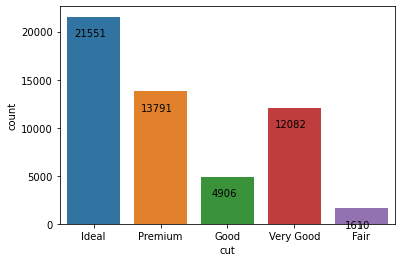

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64


In [15]:
cut = sns.countplot(x='cut', data=diamond)
for a in cut.patches:
    cut.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(diamond['cut'].value_counts(normalize=True)*100)

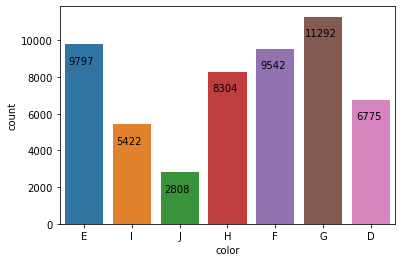

G    20.934372
E    18.162773
F    17.690026
H    15.394883
D    12.560252
I    10.051910
J     5.205784
Name: color, dtype: float64


In [16]:
color = sns.countplot(x='color', data=diamond)
for a in color.patches:
    color.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(diamond['color'].value_counts(normalize=True)*100)

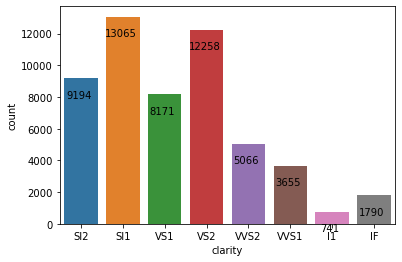

SI1     24.221357
VS2     22.725250
SI2     17.044865
VS1     15.148313
VVS2     9.391917
VVS1     6.776047
IF       3.318502
I1       1.373749
Name: clarity, dtype: float64


In [17]:
clarity = sns.countplot(x='clarity', data=diamond)
for a in clarity.patches:
    clarity.annotate(f'\n{a.get_height()}', (a.get_x()+0.35, a.get_height()), ha='center', va='top', color='black', size=10)
plt.show()
print(diamond['clarity'].value_counts(normalize=True)*100)

# creating a cluster to properly analyse the numerical varibles

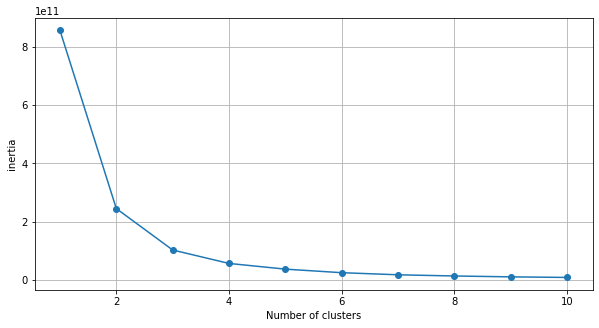

In [11]:
# creating a function to work out the optimum number of clusters

def optKMeans(dat, maxK):
    means = []
    inertias = []
    
    for k in range(1, maxK):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(dat)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    #generating the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('inertia')
    plt.grid(True)
    plt.show()
    
# identifying the cluster that works best for the bill statement columns
optKMeans(diamond[['carat', 'depth(%)', 'table', 'length', 'width', 'depth(mm)', 'price']], 11)

since 2 clusters is the optimum value as shown in our elbow graph we would use it as the value for our cluster

In [12]:
# applying k means clustering so we can analyze each feature 

km = KMeans(n_clusters=2, init= 'k-means++', max_iter=300, n_init=10, random_state=0)

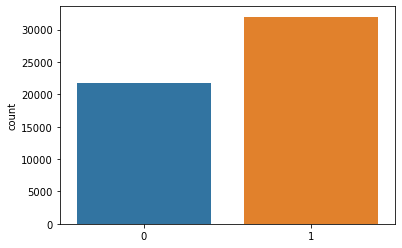

In [18]:
# analyzing each feature
clusCarat = km.fit_predict(diamond[['carat']]) # , 'depth(%)', 'table', 'length', 'width', 'depth(mm)', 'price'
sns.countplot(x=clusCarat, data=diamond)
plt.show()

In [19]:
list(clusCarat)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [20]:
list(diamond['carat'])

[1.2,
 1.5,
 1.83,
 1.72,
 2.14,
 2.15,
 2.22,
 2.27,
 1.81,
 2.49,
 2.0,
 2.72,
 2.74,
 3.11,
 5.01,
 4.5,
 0.7,
 0.85,
 1.0,
 0.99,
 0.99,
 0.96,
 0.95,
 1.17,
 1.2,
 1.2,
 1.52,
 1.5,
 1.5,
 1.5,
 1.5,
 1.51,
 2.0,
 2.01,
 2.01,
 1.51,
 1.96,
 2.2,
 3.02,
 0.7,
 0.73,
 0.7,
 0.73,
 0.9,
 1.0,
 1.0,
 1.0,
 1.04,
 1.0,
 1.06,
 1.17,
 1.01,
 0.97,
 1.2,
 1.2,
 1.05,
 1.21,
 1.19,
 1.5,
 1.13,
 1.02,
 1.5,
 1.52,
 1.51,
 1.32,
 1.41,
 1.52,
 1.52,
 1.47,
 1.5,
 1.5,
 1.5,
 1.5,
 2.0,
 1.82,
 2.03,
 2.03,
 2.14,
 1.49,
 2.22,
 2.25,
 2.32,
 1.83,
 3.0,
 2.0,
 3.01,
 3.65,
 4.13,
 0.7,
 0.73,
 0.7,
 0.76,
 0.85,
 0.85,
 0.85,
 0.85,
 0.89,
 0.96,
 0.96,
 0.96,
 0.96,
 0.96,
 0.9,
 0.96,
 0.96,
 0.96,
 1.05,
 1.3,
 1.29,
 1.0,
 1.51,
 1.29,
 1.64,
 2.01,
 2.02,
 2.02,
 2.03,
 2.07,
 2.1,
 2.1,
 2.17,
 2.25,
 2.27,
 2.31,
 2.5,
 2.5,
 2.52,
 0.5,
 0.5,
 0.5,
 0.59,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.72,
 0.97,
 0.85,
 0.98,
 0.8,
 0.98,
 0.98,
 

- figures <= 0.85 are represented by the cluster figure 1
- figures > 0.85 are represented by the cluster figure 0

The chart shows that the diamonds with carat (weight) lower than 0.85 outnumber those above 0.85

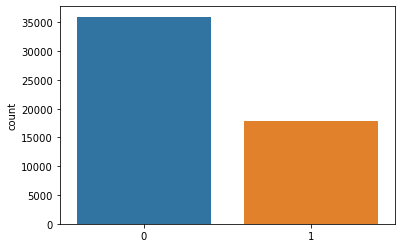

In [24]:
clusDep = km.fit_predict(diamond[['depth(%)']]) #  'table', 'length', 'width', 'depth(mm)', 'price'
sns.countplot(x=clusDep, data=diamond)
plt.show()

In [25]:
list(clusDep)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


In [26]:
list(diamond['depth(%)'])

[64.9,
 68.8,
 70.0,
 68.5,
 69.4,
 65.5,
 66.7,
 67.6,
 68.0,
 66.3,
 66.5,
 68.2,
 64.9,
 65.9,
 65.5,
 65.8,
 64.7,
 65.5,
 65.0,
 73.6,
 62.9,
 59.5,
 64.9,
 65.4,
 62.2,
 66.2,
 67.7,
 71.3,
 66.1,
 69.7,
 65.1,
 65.7,
 66.0,
 67.4,
 55.9,
 65.1,
 66.8,
 66.3,
 65.2,
 66.3,
 70.8,
 68.6,
 66.1,
 67.2,
 68.6,
 66.9,
 64.5,
 67.3,
 65.4,
 64.5,
 64.5,
 56.1,
 67.3,
 66.7,
 65.1,
 61.8,
 65.0,
 65.1,
 65.6,
 64.8,
 61.5,
 69.3,
 64.9,
 65.6,
 65.8,
 64.7,
 69.7,
 65.4,
 66.7,
 65.7,
 66.6,
 68.9,
 65.5,
 69.8,
 67.3,
 64.4,
 66.6,
 66.4,
 66.9,
 70.1,
 67.7,
 70.5,
 68.0,
 67.1,
 66.8,
 56.1,
 67.1,
 64.8,
 66.5,
 66.2,
 62.1,
 64.5,
 66.9,
 71.2,
 61.0,
 66.7,
 58.8,
 61.5,
 61.1,
 66.9,
 64.3,
 69.2,
 66.9,
 68.9,
 60.1,
 67.4,
 61.8,
 64.4,
 67.7,
 66.4,
 65.6,
 66.0,
 64.5,
 70.2,
 68.0,
 65.6,
 66.3,
 67.7,
 67.4,
 64.6,
 55.6,
 64.9,
 68.6,
 67.4,
 64.7,
 65.1,
 66.9,
 64.6,
 64.9,
 65.2,
 64.6,
 67.3,
 67.3,
 65.2,
 64.3,
 66.7,
 68.3,
 66.9,
 60.4,
 67.5,
 62.5,
 68.6,
 64.6,

- figures < 61.5 are represented by the cluster figure 1
- figures >= 61.5 are represented by the cluster figure 0

The chart shows that the diamonds with total depth percentage above 61.5 greatly outnumbers those below 61.5

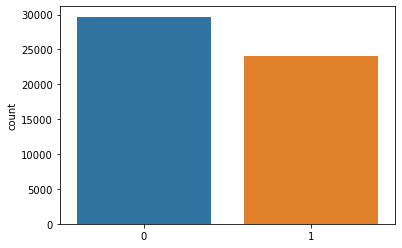

In [27]:
clusTable = km.fit_predict(diamond[['table']]) # 'length', 'width', 'depth(mm)', 'price'
sns.countplot(x=clusTable, data=diamond)
plt.show()

In [28]:
list(clusTable)

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,


In [29]:
list(diamond['table'])

[59.0,
 57.0,
 58.0,
 59.0,
 57.0,
 57.0,
 56.0,
 55.0,
 57.0,
 58.0,
 56.0,
 56.0,
 61.0,
 57.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 60.0,
 58.0,
 60.0,
 56.0,
 62.0,
 66.0,
 55.0,
 58.0,
 58.0,
 57.0,
 56.0,
 59.0,
 61.0,
 60.0,
 58.0,
 64.0,
 57.0,
 55.0,
 56.0,
 56.0,
 63.0,
 55.0,
 57.0,
 58.0,
 60.0,
 56.0,
 57.0,
 58.0,
 56.0,
 57.0,
 57.0,
 59.0,
 63.0,
 55.0,
 57.0,
 55.0,
 66.0,
 58.0,
 59.0,
 54.0,
 59.0,
 60.0,
 61.0,
 58.0,
 61.0,
 55.0,
 58.0,
 55.0,
 62.0,
 59.0,
 58.0,
 54.0,
 56.0,
 58.0,
 54.0,
 58.0,
 59.0,
 57.0,
 56.0,
 61.0,
 55.0,
 58.0,
 55.0,
 57.0,
 57.0,
 57.0,
 62.0,
 53.0,
 61.0,
 57.0,
 56.0,
 66.0,
 57.0,
 54.0,
 54.0,
 61.0,
 59.0,
 66.0,
 63.0,
 60.0,
 60.0,
 59.0,
 56.0,
 63.0,
 59.0,
 62.0,
 62.0,
 57.0,
 57.0,
 62.0,
 59.0,
 54.0,
 58.0,
 60.0,
 57.0,
 55.0,
 57.0,
 56.0,
 56.0,
 59.0,
 58.0,
 62.0,
 58.0,
 56.0,
 56.0,
 57.0,
 59.0,
 57.0,
 60.0,
 57.0,
 56.0,
 56.0,
 57.0,
 59.0,
 58.0,
 62.0,
 55.0,
 56.0,
 55.0,
 58.0,
 55.0,
 59.0,
 59.0,
 59.0,

- figures < 57.5 are represented by the cluster figure 0
- figures > 57.5 are represented by the cluster figure 1

The chart shows that the diamonds with width of top of diamond relative to widest point lower than 57.5 slightly outnumbers those above 57.5

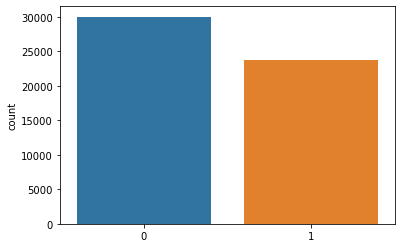

In [30]:
clusLength = km.fit_predict(diamond[['length']]) # 'width', 'depth(mm)', 'price'
sns.countplot(x=clusLength, data=diamond)
plt.show()

In [31]:
list(clusLength)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,


In [32]:
list(diamond['length'])

[6.61,
 6.94,
 7.34,
 7.31,
 7.74,
 8.01,
 8.04,
 8.05,
 7.43,
 8.26,
 7.93,
 8.46,
 8.76,
 9.15,
 10.74,
 10.23,
 5.59,
 5.95,
 6.27,
 6.01,
 6.33,
 6.28,
 6.17,
 6.68,
 6.77,
 6.61,
 7.07,
 6.85,
 7.12,
 6.94,
 7.12,
 7.08,
 7.78,
 7.71,
 8.48,
 7.16,
 7.62,
 8.05,
 9.11,
 5.58,
 5.51,
 5.46,
 5.63,
 5.96,
 6.2,
 6.15,
 6.33,
 6.34,
 6.28,
 6.47,
 6.67,
 6.7,
 6.08,
 6.57,
 6.65,
 6.48,
 6.65,
 6.62,
 7.26,
 6.52,
 6.4,
 6.99,
 7.18,
 7.16,
 6.87,
 7.05,
 6.92,
 7.1,
 6.98,
 7.07,
 7.05,
 7.0,
 7.02,
 7.6,
 7.5,
 7.91,
 7.81,
 8.0,
 6.93,
 7.77,
 8.01,
 7.93,
 7.47,
 8.93,
 7.81,
 9.54,
 9.53,
 10.0,
 5.51,
 5.62,
 5.56,
 5.79,
 5.98,
 5.77,
 6.2,
 5.86,
 6.21,
 6.22,
 6.26,
 6.15,
 6.38,
 5.97,
 6.04,
 6.09,
 6.21,
 6.13,
 6.51,
 6.93,
 6.69,
 6.16,
 7.28,
 6.82,
 7.44,
 7.53,
 7.77,
 7.87,
 7.81,
 7.76,
 7.82,
 8.05,
 8.75,
 8.15,
 7.99,
 8.05,
 8.48,
 8.55,
 8.39,
 5.04,
 5.01,
 4.95,
 5.26,
 5.53,
 5.51,
 5.57,
 5.59,
 5.64,
 5.52,
 5.6,
 5.74,
 5.59,
 5.65,
 5.45,
 5.64,
 5.5,
 

- figures < 5.85 are represented by the cluster figure 0
- figures > 5.85 are represented by the cluster figure 1

The chart shows that the diamonds with length in mm lower than 5.85 slightly outnumbers those above 5.85

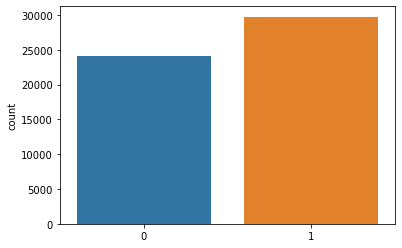

In [34]:
clusWidth = km.fit_predict(diamond[['width']]) # 'depth(mm)', 'price'
sns.countplot(x=clusWidth, data=diamond)
plt.show()

In [35]:
list(clusWidth)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [36]:
list(diamond['width'])

[6.54,
 6.87,
 7.28,
 7.24,
 7.7,
 7.95,
 8.02,
 8.0,
 7.39,
 8.18,
 7.8,
 8.43,
 8.66,
 9.02,
 10.54,
 10.16,
 5.5,
 5.82,
 6.17,
 5.8,
 6.1,
 6.23,
 6.12,
 6.57,
 6.7,
 6.51,
 7.0,
 6.81,
 7.04,
 6.9,
 6.96,
 7.02,
 7.74,
 7.64,
 8.39,
 7.12,
 7.6,
 8.0,
 9.02,
 5.43,
 5.34,
 5.34,
 5.5,
 5.88,
 6.08,
 6.03,
 6.1,
 6.23,
 6.2,
 6.33,
 6.47,
 6.65,
 6.02,
 6.05,
 6.59,
 6.37,
 6.59,
 6.55,
 7.09,
 6.42,
 6.34,
 6.81,
 7.13,
 7.0,
 6.83,
 7.0,
 6.89,
 7.02,
 6.94,
 7.02,
 7.01,
 6.9,
 6.96,
 7.56,
 7.47,
 7.85,
 7.75,
 7.92,
 6.89,
 7.74,
 7.97,
 7.9,
 7.44,
 8.84,
 7.72,
 9.38,
 9.48,
 9.85,
 5.4,
 5.46,
 5.52,
 5.76,
 5.75,
 5.65,
 6.0,
 5.78,
 6.09,
 6.06,
 6.07,
 6.04,
 5.88,
 5.83,
 5.91,
 5.96,
 6.0,
 5.96,
 6.4,
 6.86,
 6.59,
 6.09,
 7.1,
 6.75,
 7.35,
 7.5,
 7.72,
 7.8,
 7.75,
 7.73,
 7.76,
 8.01,
 8.69,
 8.12,
 7.94,
 7.99,
 8.44,
 8.39,
 8.33,
 4.96,
 4.97,
 4.89,
 5.2,
 5.38,
 5.45,
 5.49,
 5.49,
 5.49,
 5.4,
 5.52,
 5.68,
 5.37,
 5.48,
 5.31,
 5.48,
 5.47,
 5.55,
 6.36,
 5.

- figures < 5.85 are represented by the cluster figure 1
- figures > 5.85 are represented by the cluster figure 0

The chart shows that the diamonds with width in mm lower than 5.85 slightly outnumbers those above 5.85

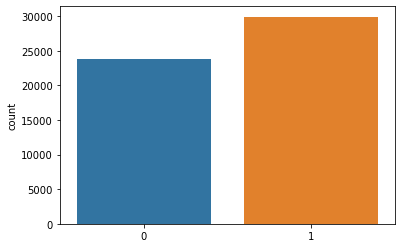

In [37]:
clusDepth = km.fit_predict(diamond[['depth(mm)']]) # 'price'
sns.countplot(x=clusDepth, data=diamond)
plt.show()

In [38]:
list(clusDepth)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [39]:
list(diamond['depth(mm)'])

[4.27,
 4.75,
 5.12,
 4.98,
 5.36,
 5.23,
 5.36,
 5.43,
 5.04,
 5.45,
 5.23,
 5.76,
 5.65,
 5.98,
 6.98,
 6.72,
 3.59,
 3.86,
 4.05,
 4.35,
 3.91,
 3.72,
 3.99,
 4.33,
 4.2,
 4.34,
 4.76,
 4.87,
 4.68,
 4.82,
 4.58,
 4.63,
 5.1,
 5.17,
 4.71,
 4.65,
 5.08,
 5.32,
 5.91,
 3.66,
 3.84,
 3.71,
 3.68,
 3.98,
 4.22,
 4.09,
 4.01,
 4.22,
 4.08,
 4.13,
 4.25,
 3.74,
 4.07,
 4.37,
 4.31,
 3.97,
 4.3,
 4.29,
 4.7,
 4.19,
 3.92,
 4.78,
 4.65,
 4.66,
 4.51,
 4.55,
 4.81,
 4.62,
 4.64,
 4.63,
 4.68,
 4.79,
 4.58,
 5.29,
 5.04,
 5.07,
 5.19,
 5.29,
 4.62,
 5.44,
 5.41,
 5.58,
 5.07,
 5.97,
 5.19,
 5.31,
 6.38,
 6.43,
 3.64,
 3.69,
 3.44,
 3.73,
 3.94,
 4.07,
 3.73,
 3.88,
 3.62,
 3.78,
 3.77,
 4.09,
 3.98,
 4.08,
 4.0,
 4.15,
 3.68,
 4.08,
 3.99,
 4.44,
 4.5,
 4.07,
 4.72,
 4.48,
 4.76,
 5.27,
 5.27,
 5.15,
 5.16,
 5.25,
 5.24,
 5.19,
 4.8,
 5.28,
 5.47,
 5.41,
 5.47,
 5.53,
 5.6,
 3.23,
 3.24,
 3.21,
 3.38,
 3.68,
 3.69,
 3.61,
 3.57,
 3.71,
 3.73,
 3.72,
 3.45,
 3.71,
 3.48,
 3.7,
 3.6,
 3.58,
 3

- figures < 3.63 are represented by the cluster figure 1
- figures > 3.63 are represented by the cluster figure 0

The chart shows that the diamonds with depth in mm lower than 3.63 slightly outnumbers those above 3.63

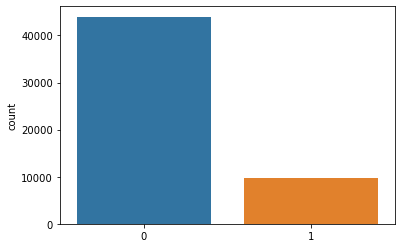

In [40]:
clusPrice = km.fit_predict(diamond[['price']]) 
sns.countplot(x=clusPrice, data=diamond)
plt.show()

In [41]:
list(clusPrice)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [48]:
list(diamond['price'])

[3011,
 4284,
 5083,
 5240,
 5405,
 5430,
 5607,
 5733,
 5859,
 6289,
 6796,
 6870,
 8807,
 9823,
 18018,
 18531,
 1066,
 1334,
 1784,
 1789,
 1901,
 2304,
 2322,
 2935,
 3011,
 3011,
 3745,
 4368,
 4704,
 4704,
 5040,
 5074,
 5667,
 5696,
 5696,
 5750,
 6147,
 7934,
 10577,
 1014,
 1049,
 1147,
 1175,
 1786,
 1805,
 1997,
 2035,
 2037,
 2112,
 2239,
 2336,
 2342,
 2357,
 2376,
 2376,
 2396,
 2396,
 2892,
 2964,
 2968,
 2999,
 3175,
 3504,
 3765,
 4140,
 4145,
 4648,
 4648,
 4898,
 4939,
 4939,
 5292,
 5645,
 5914,
 5993,
 6002,
 6002,
 6328,
 6425,
 6564,
 6653,
 6860,
 6887,
 8044,
 8064,
 10761,
 11668,
 17329,
 1058,
 1104,
 1138,
 1140,
 1250,
 1274,
 1324,
 1324,
 1334,
 1637,
 1705,
 1705,
 1739,
 1739,
 1758,
 1773,
 1808,
 1808,
 2293,
 2512,
 2596,
 2808,
 4167,
 4277,
 4849,
 6315,
 6346,
 6346,
 6377,
 6503,
 6597,
 6597,
 6817,
 7069,
 7131,
 7257,
 7854,
 8711,
 10076,
 701,
 727,
 727,
 903,
 956,
 956,
 956,
 956,
 956,
 978,
 1001,
 1069,
 1069,
 1069,
 1092,
 1115,
 1

- prices < 6700 are represented by the cluster figure 0
- prices > 6700 are represented by the cluster figure 1

The chart shows that the diamonds with price lower than 6700 greatly outnumbers those above 6700

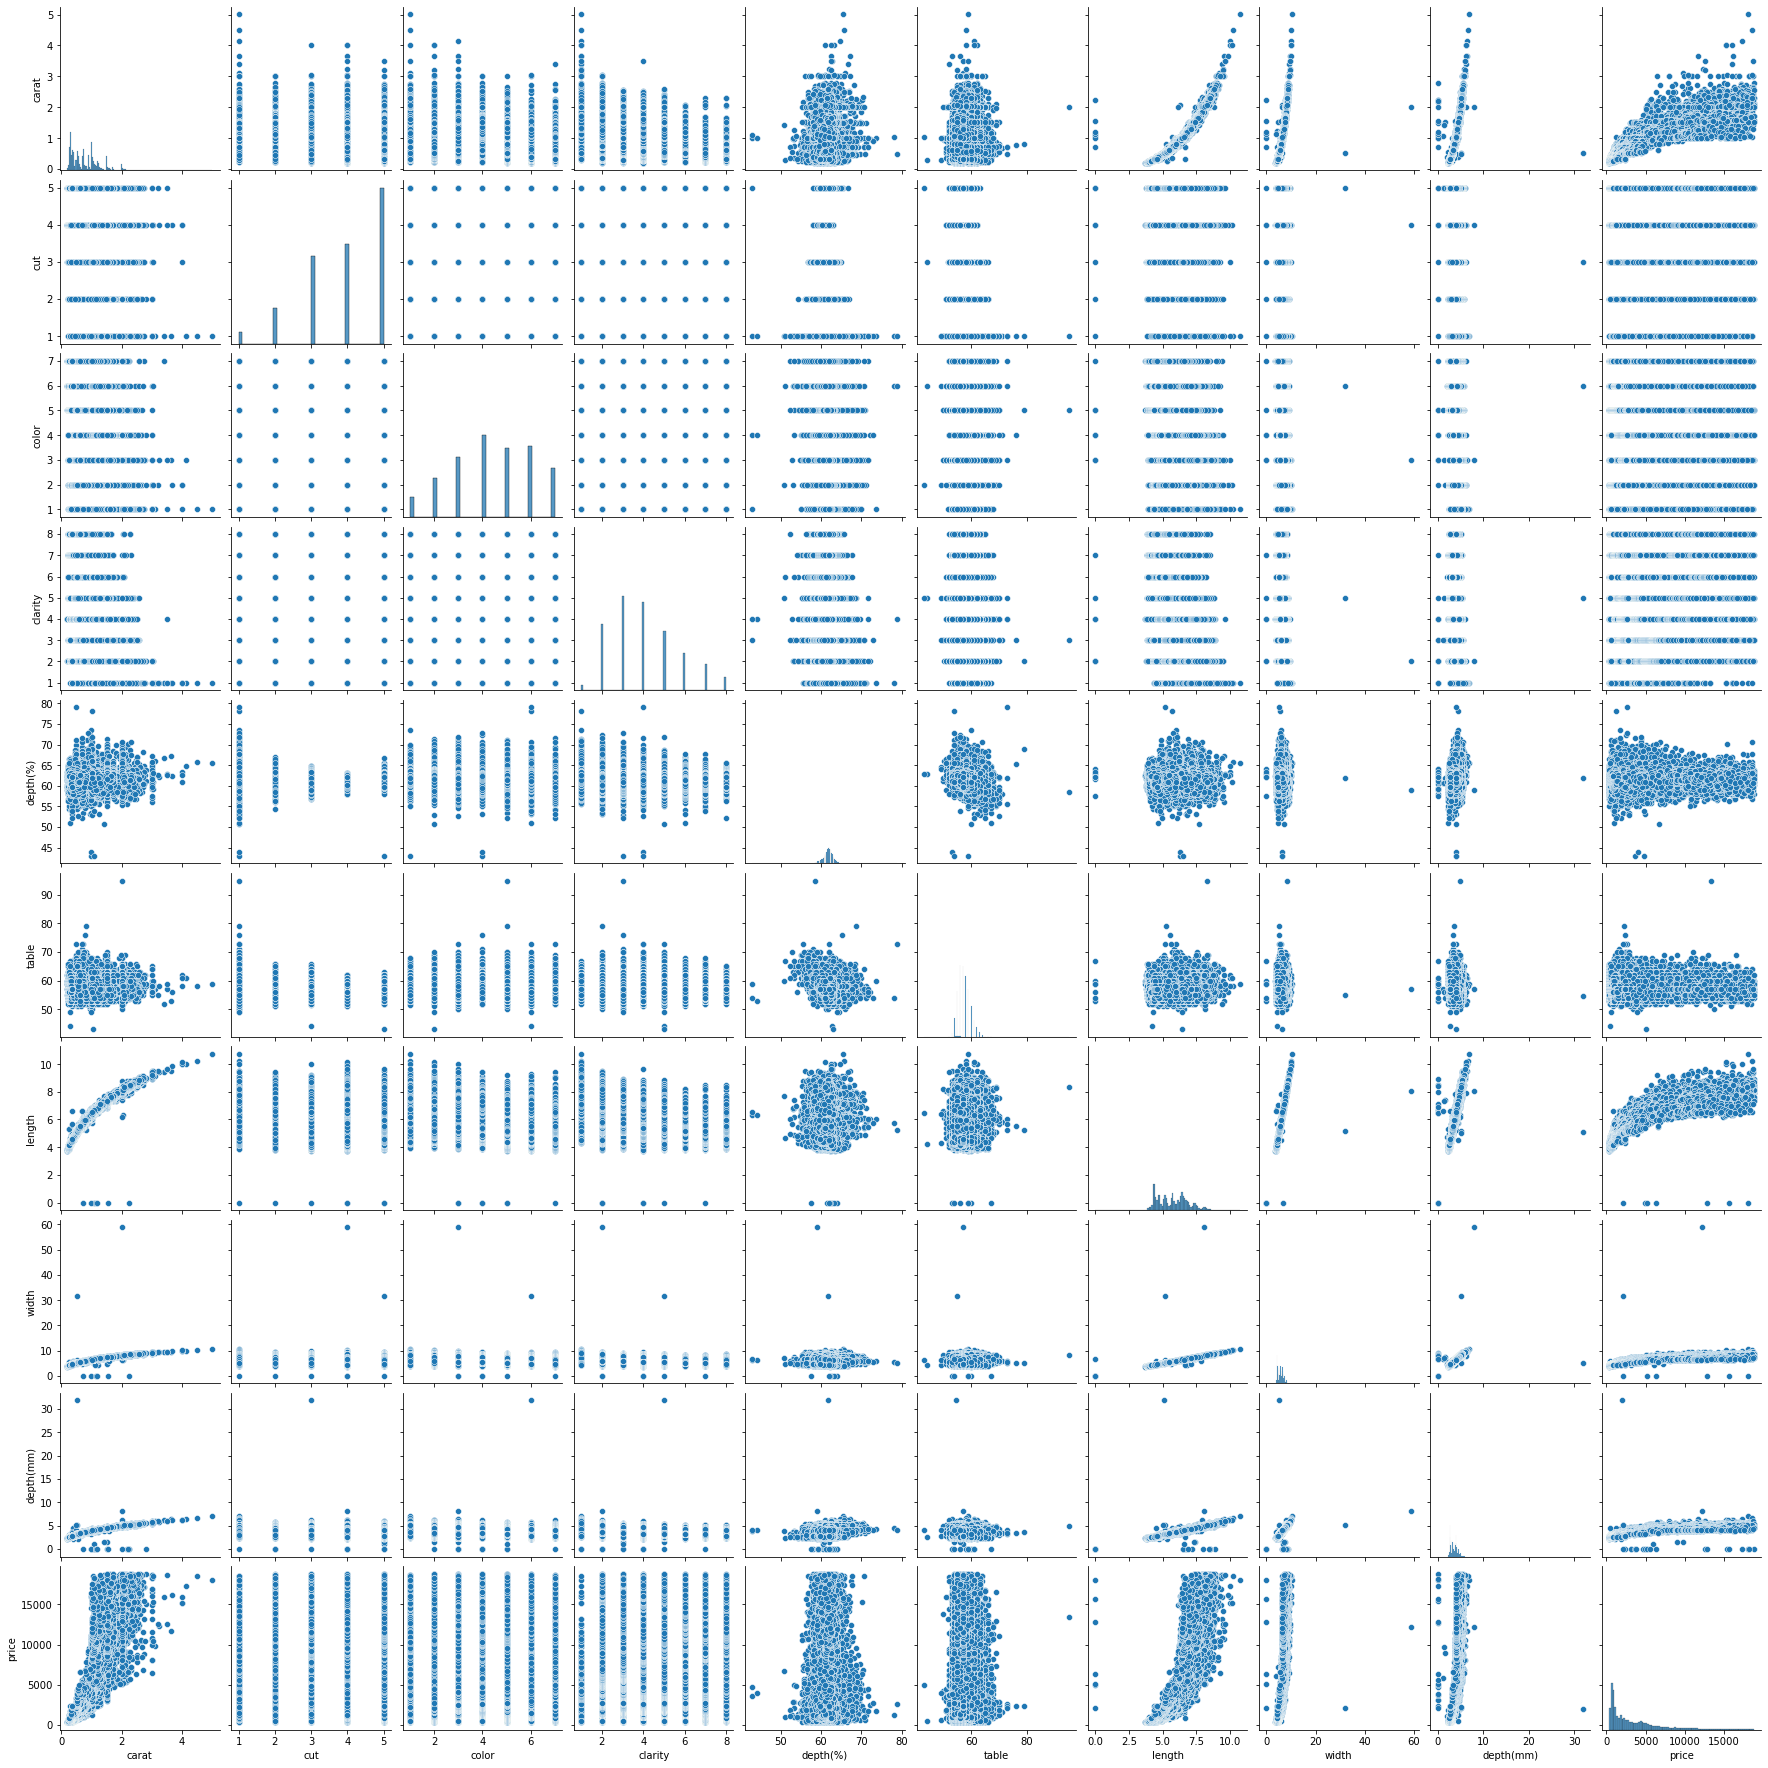

In [43]:
sns.pairplot(diamond)

<AxesSubplot:>

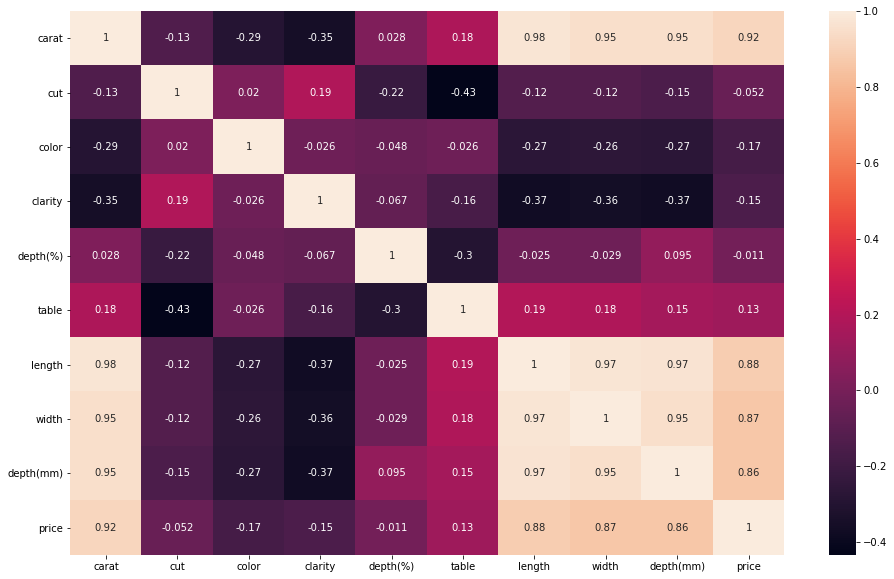

In [46]:
set_option('display.width', 100)
plt.figure(figsize=(16,10))
sns.heatmap(diamond.corr(), annot=True)

The pairplot and coorrelation charts show that carat, length, width, and depth in mm are contributing factors to the price od diamonds

Interpreting the features with a significant correlation

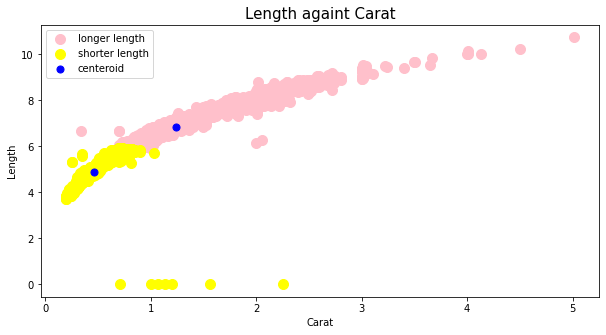

In [74]:
x = diamond.loc[:, ['carat', 'length']].values
yMeans = km.fit_predict(x)

plt.scatter(x[yMeans==0,0], x[yMeans==0,1], s=100, c='pink', label='longer length')
plt.scatter(x[yMeans==1,0], x[yMeans==1,1], s=100, c='yellow', label='shorter length')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='blue', label='centeroid')

plt.gcf().set_size_inches(10,5)
plt.title('Length againt Carat', fontsize=15)
plt.xlabel('Carat')
plt.ylabel('Length')
plt.legend()
plt.show()

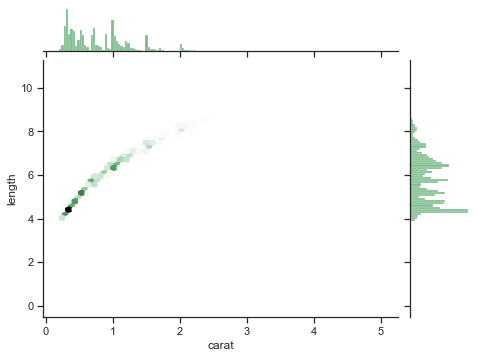

In [25]:
sns.set(style="ticks")
# hexbin plot
sns.jointplot(diamond['carat'], diamond['length'], kind="hex", color="g")
plt.gcf().set_size_inches(7,5)

From these graphs, we can see that a good number of diamond sold are within 0.4 - 1.3 carat

The length in mm is also from 4.3 - 6.8

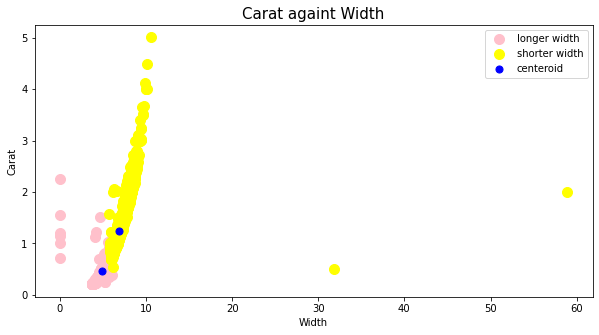

In [86]:
y = diamond.loc[:, ['width', 'carat']].values
yMeans = km.fit_predict(y)

plt.scatter(y[yMeans==0,0], y[yMeans==0,1], s=100, c='pink', label='longer width')
plt.scatter(y[yMeans==1,0], y[yMeans==1,1], s=100, c='yellow', label='shorter width')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='blue', label='centeroid')

plt.gcf().set_size_inches(10,5)
plt.title('Carat againt Width', fontsize=15)
plt.xlabel('Width')
plt.ylabel('Carat')
plt.legend()
plt.show()

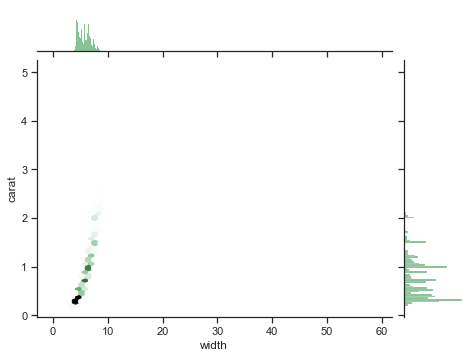

In [27]:
sns.set(style="ticks")
sns.jointplot(diamond['width'], diamond['carat'], kind="hex", color="g")
plt.gcf().set_size_inches(7,5)

From these graphs, we can see that a good number of diamond sold are within 0.3 - 1.3 carat

The width in mm is also from 4 - 7

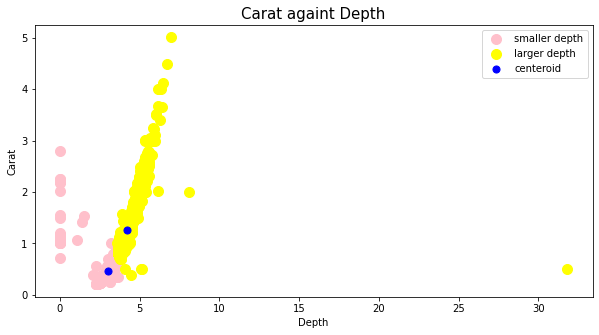

In [85]:
x = diamond.loc[:, ['depth(mm)', 'carat']].values
yMeans = km.fit_predict(x)

plt.scatter(x[yMeans==0,0], x[yMeans==0,1], s=100, c='pink', label='smaller depth')
plt.scatter(x[yMeans==1,0], x[yMeans==1,1], s=100, c='yellow', label='larger depth')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=50, c='blue', label='centeroid')

plt.gcf().set_size_inches(10,5)
plt.title('Carat againt Depth', fontsize=15)
plt.xlabel('Depth')
plt.ylabel('Carat')
plt.legend()
plt.show()

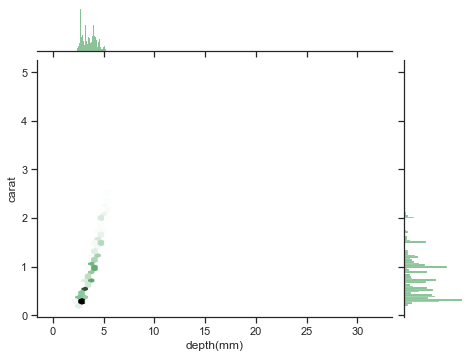

In [28]:
sns.set(style="ticks")
sns.jointplot(diamond['depth(mm)'], diamond['carat'], kind="hex", color="g")
plt.gcf().set_size_inches(7,5)

From these graphs, we can see that a good number of diamond sold are within 0.3 - 1.3 carat

The Depth in mm is also from 3 - 4.7

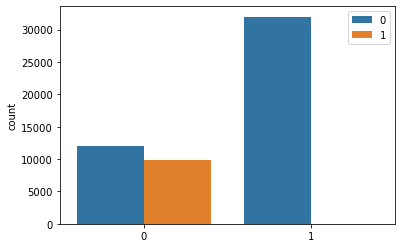

In [89]:
sns.countplot(x=clusCarat, hue=clusPrice)
plt.show()

From a previous graph, we know that diamonds with carat;
- above 0.85 are represented by cluster figure 0
- same as or lower than 0.85 are represented by cluster figure 1

Also from a previous graph, we know that diamonds with prices;
- below 6700 are represented by the cluster figure 0
- above 6700 are represented by the cluster figure 1

This chart shows that the diamonds; 
- nearly half of all diamonds with carat (weight) above 0.85 are sold above 6700 
- while all diamonds with carat (weight) same as or below 0.85 are sold below 6700 

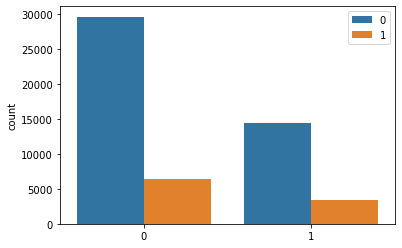

In [90]:
sns.countplot(x=clusDep, hue=clusPrice)
plt.show()

From a previous graph we know that diamonds with total depth percentage;
- same as or above 61.5 are represented by cluster figure 0
- lower than 61.5 are represented by cluster figure 1

Also from a previous graph, we know that diamonds with prices;
- below 6700 are represented by the cluster figure 0
- above 6700 are represented by the cluster figure 1

This chart shows that the diamonds with total depth percentage; 
- same as or above 61.5 have more diamonds sold above & below 6700 respectively compared below 61.5

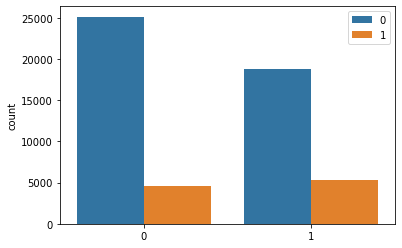

In [91]:
sns.countplot(x=clusTable, hue=clusPrice)
plt.show()

From a previous graph we know that diamonds with width of top of diamond relative to widest point;
- lower than 57.5 are represented by cluster figure 0
- above 57.5 are represented by cluster figure 1

Also from a previous graph, we know that diamonds with prices;
- below 6700 are represented by the cluster figure 0
- above 6700 are represented by the cluster figure 1

This chart shows that the diamonds with width of top of diamond relative to widest point;
- above 57.5 slightly have more diamonds sold above 6700 but a lower number sold below 6700 campared to those below 57.5

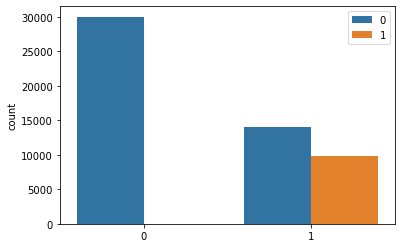

In [97]:
sns.countplot(x=clusLength, hue=clusPrice)
plt.show()

From a previous graph, we know that diamonds with length in mm;
- lower than 5.85 are represented by the cluster figure 0
- above 5.85 are represented by the cluster figure 1

Also from a previous graph, we know that diamonds with prices;
- below 6700 are represented by the cluster figure 0
- above 6700 are represented by the cluster figure 1

This chart shows that the diamonds with length in mm;
- above 5.85 have the only sales price above 6700 campared to those below 5.85
- lower than 5.85 have more diamonds sold below 6700 than those above 5.85

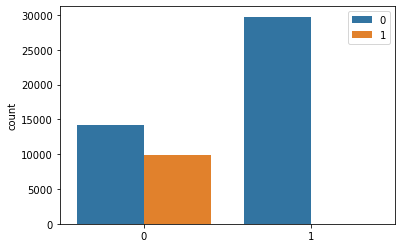

In [98]:
sns.countplot(x=clusWidth, hue=clusPrice)
plt.show()

From a previous graph, we know that diamonds with width in mm;
- lower than 5.85 are represented by the cluster figure 1
- above 5.85 are represented by the cluster figure 0

Also from a previous graph, we know that diamonds with prices;
- below 6700 are represented by the cluster figure 0
- above 6700 are represented by the cluster figure 1

This chart shows that the diamonds with width in mm;
- above 5.85 have the only sales price above 6700 campared to those below 5.85
- lower than 5.85 have more diamonds sold below 6700 than those above 5.85

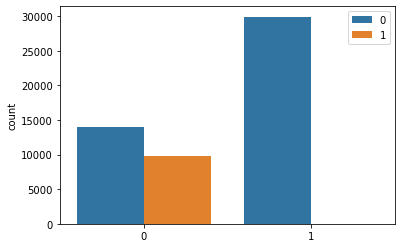

In [100]:
sns.countplot(x=clusDepth, hue=clusPrice)
plt.show()

From a previous graph, we know that diamonds with depth in mm;
- lower than 3.63 are represented by the cluster figure 1
- above 3.63 are represented by the cluster figure 0

Also from a previous graph, we know that diamonds with prices;
- below 6700 are represented by the cluster figure 0
- above 6700 are represented by the cluster figure 1

This chart shows that the diamonds with depth in mm;
- above 3.63 have the only sales price above 6700 campared to those below 3.63
- lower than 3.63 have more diamonds sold below 6700 than those above 3.63

From my analysis, the higher the carat (weight), length in mm, width in mm, and depth in mm the higher the price of the diamond.